In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
df = pd.read_csv("Sparkling.csv")

In [3]:
df1 = pd.read_csv("Sparkling.csv")

In [4]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [5]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [6]:
dates=pd.date_range(start='1980-01-01', freq='MS', periods=len(df1))

In [7]:
data = df1.copy()
data.set_index(dates, inplace=True)

In [8]:
data.head()

,YearMonth,Sparkling
1980-01-01,1980-01,1686
1980-02-01,1980-02,1591
1980-03-01,1980-03,2304
1980-04-01,1980-04,1712
1980-05-01,1980-05,1471


In [9]:
# data['Year']=df.index.year
# data['Month']=df.index.month
# data.head()

AttributeError: 'RangeIndex' object has no attribute 'year'

In [ ]:
data.drop(labels='YearMonth',inplace=True,axis=1)
data.head()

In [10]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [11]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [12]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')

In [13]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()


,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [14]:
df.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [15]:
df.drop(labels='YearMonth',inplace=True,axis=1)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [16]:
df.dtypes

Sparkling    int64
dtype: object

In [17]:
df.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


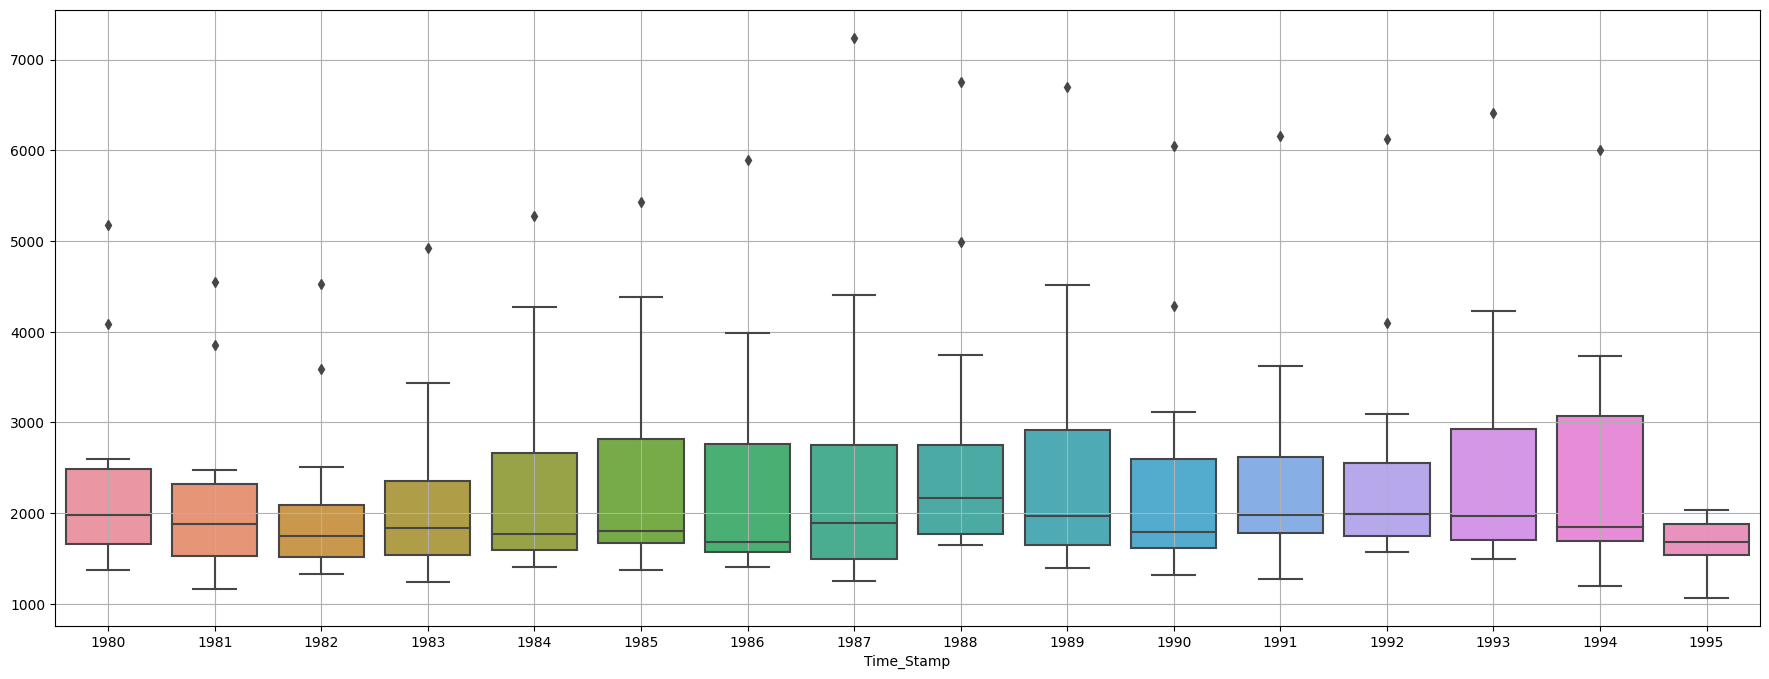

In [18]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

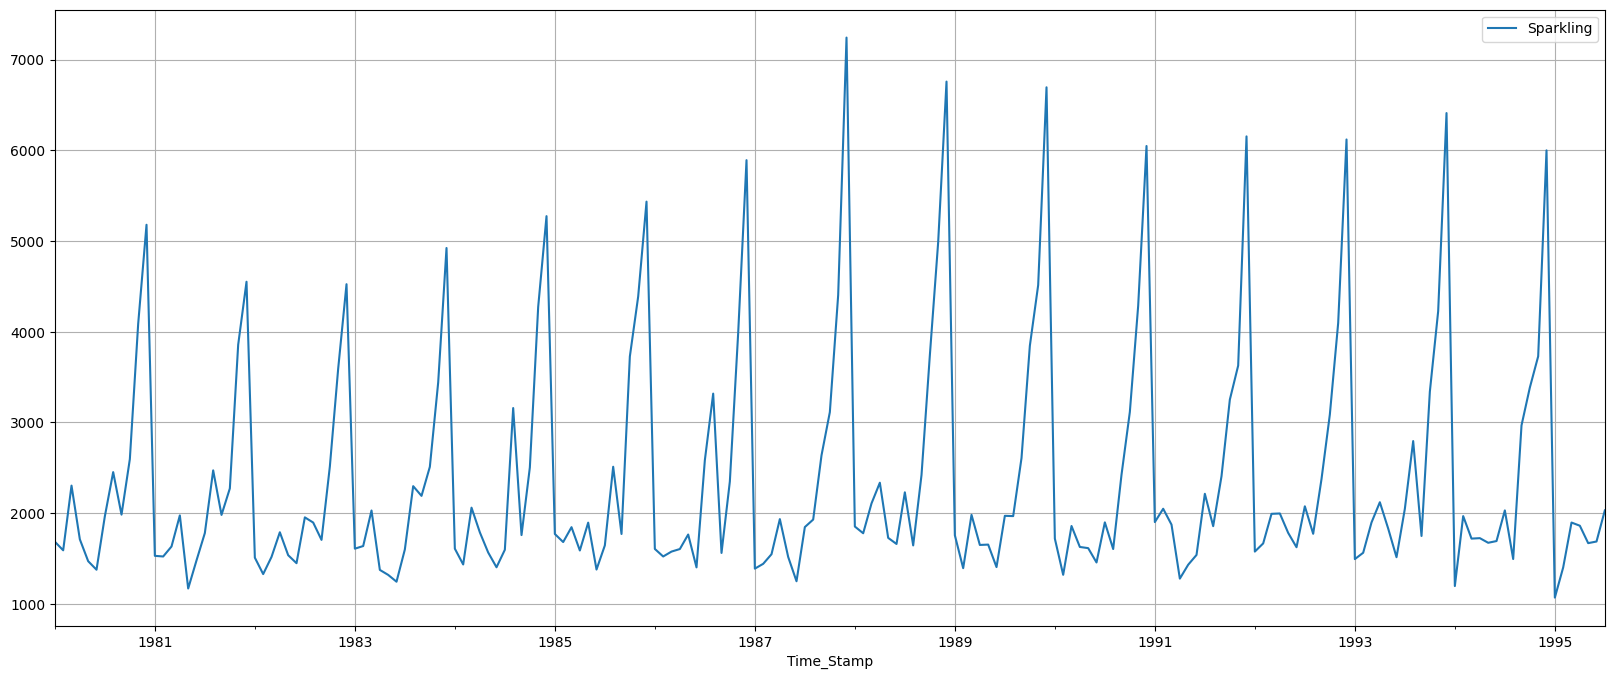

In [19]:
# plot 
df.plot(figsize=(20,8))
plt.grid();

In [20]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

,Sparkling,Year,Month
Time_Stamp,,,
1980-01-31,1686,1980,1
1980-02-29,1591,1980,2
1980-03-31,2304,1980,3
1980-04-30,1712,1980,4
1980-05-31,1471,1980,5


In [21]:
df.columns=['Sales', 'Year', 'Month']
df.head()

,Sales,Year,Month
Time_Stamp,,,
1980-01-31,1686,1980,1
1980-02-29,1591,1980,2
1980-03-31,2304,1980,3
1980-04-30,1712,1980,4
1980-05-31,1471,1980,5


In [22]:
df.tail()

,Sales,Year,Month
Time_Stamp,,,
1995-03-31,1897,1995,3
1995-04-30,1862,1995,4
1995-05-31,1670,1995,5
1995-06-30,1688,1995,6
1995-07-31,2031,1995,7


In [23]:
# number of rows and columns
df.shape

(187, 3)

In [24]:
df.isnull().sum()

Sales    0
Year     0
Month    0
dtype: int64

In [25]:
# datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   187 non-null    int64
 1   Year    187 non-null    int32
 2   Month   187 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 4.4 KB


In [26]:
# statistical summary
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Sales,187.0,2402.0,1295.0,1070.0,1605.0,1874.0,2549.0,7242.0
Year,187.0,1987.0,5.0,1980.0,1983.0,1987.0,1991.0,1995.0
Month,187.0,6.0,3.0,1.0,3.0,6.0,9.0,12.0


In [ ]:
# boxplot

dfbox=df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

<Axes: xlabel='Time_Stamp'>

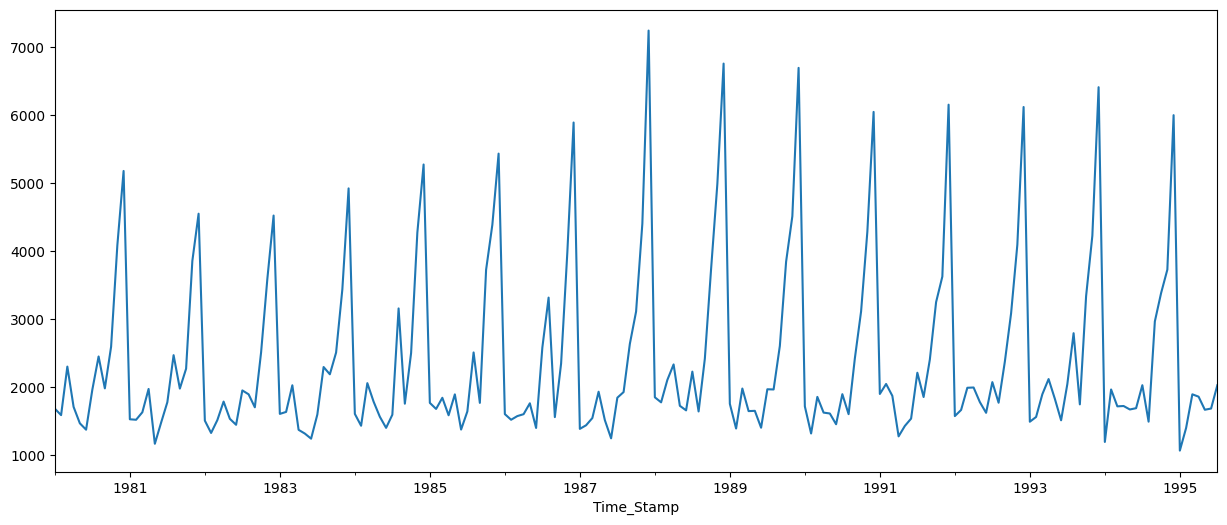

In [27]:
plt.figure(figsize=(15,6))
df['Sales'].plot()

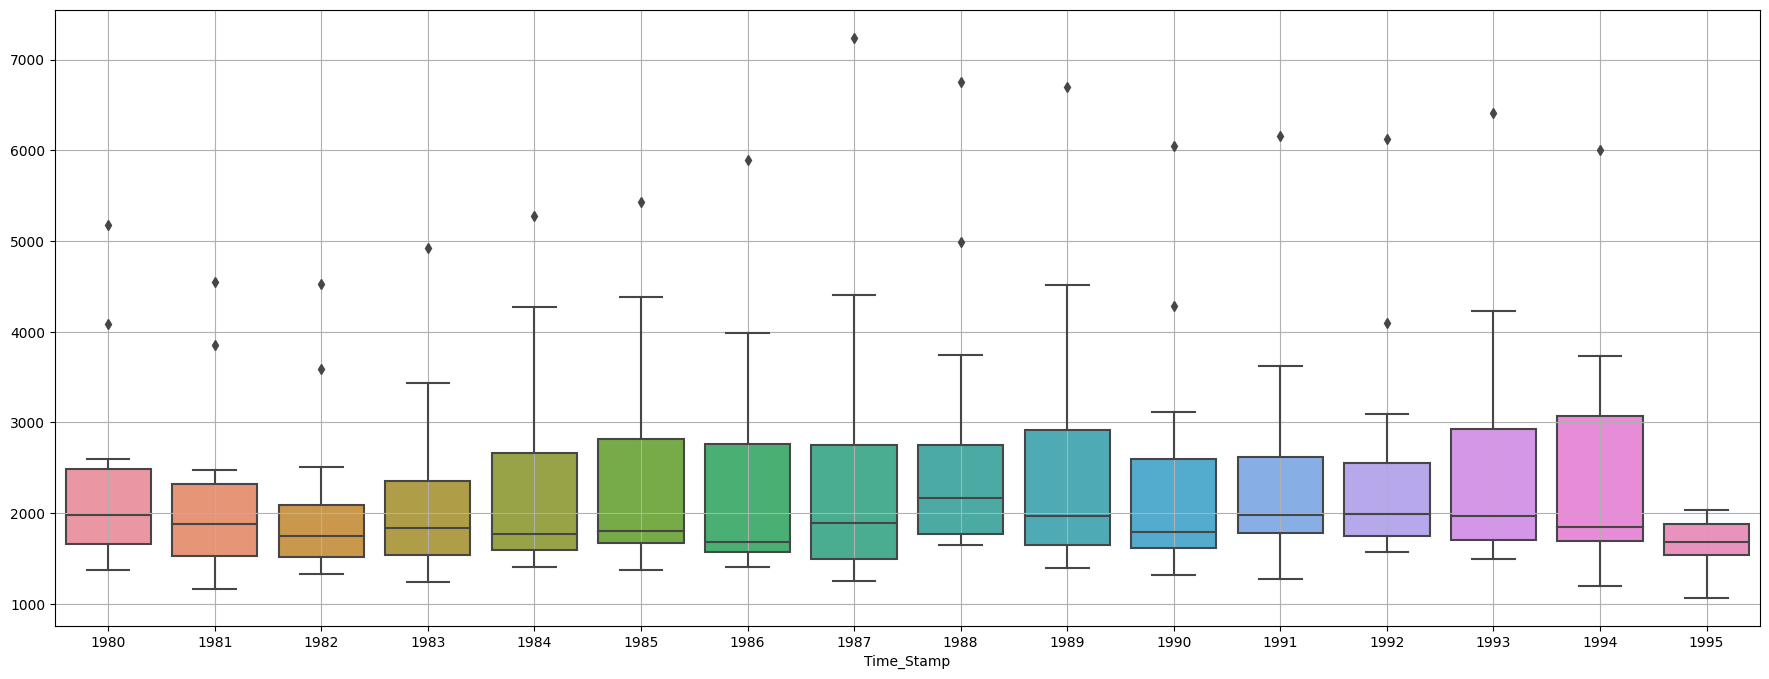

In [28]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

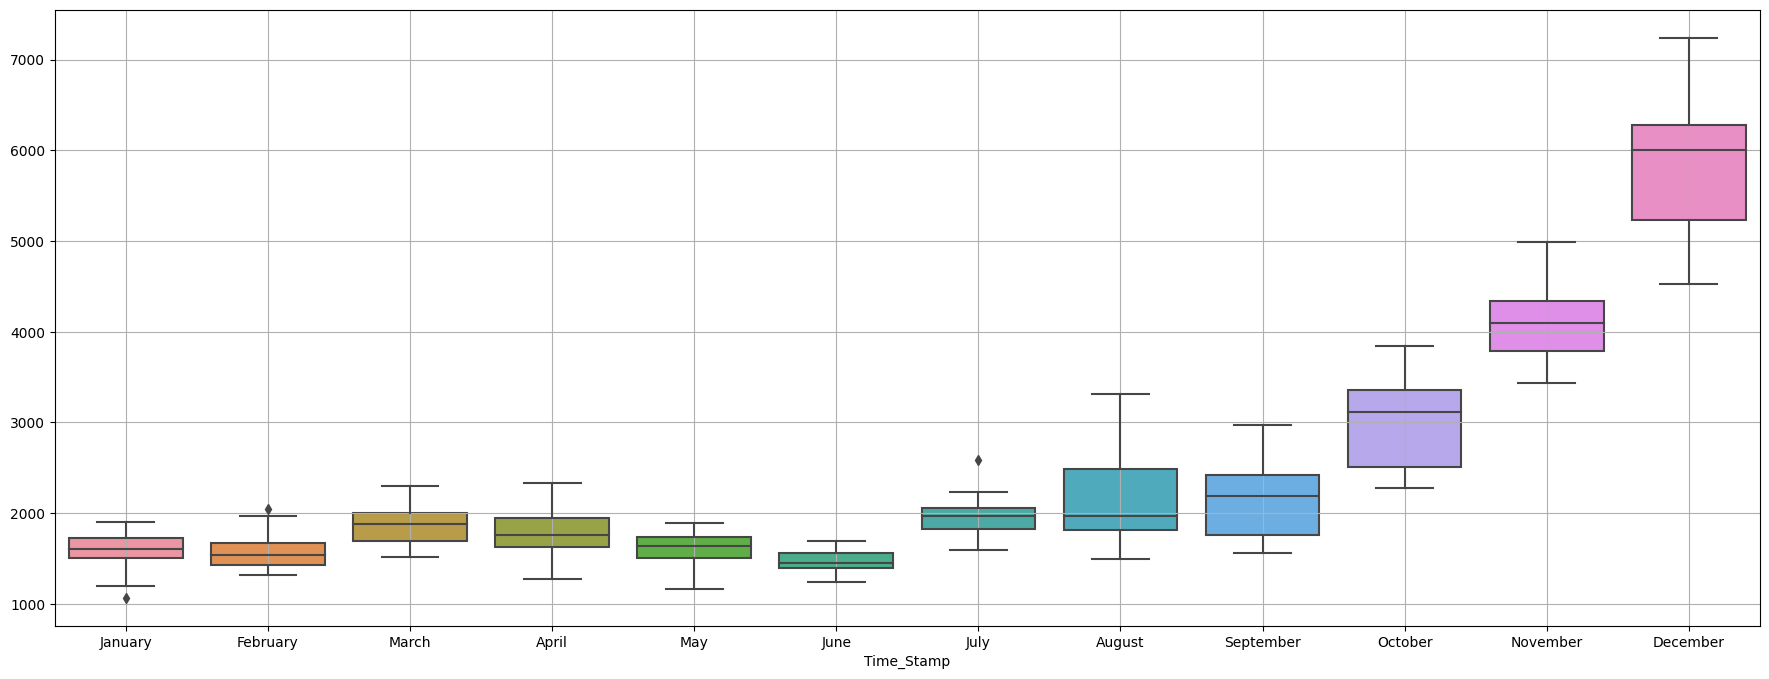

In [29]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

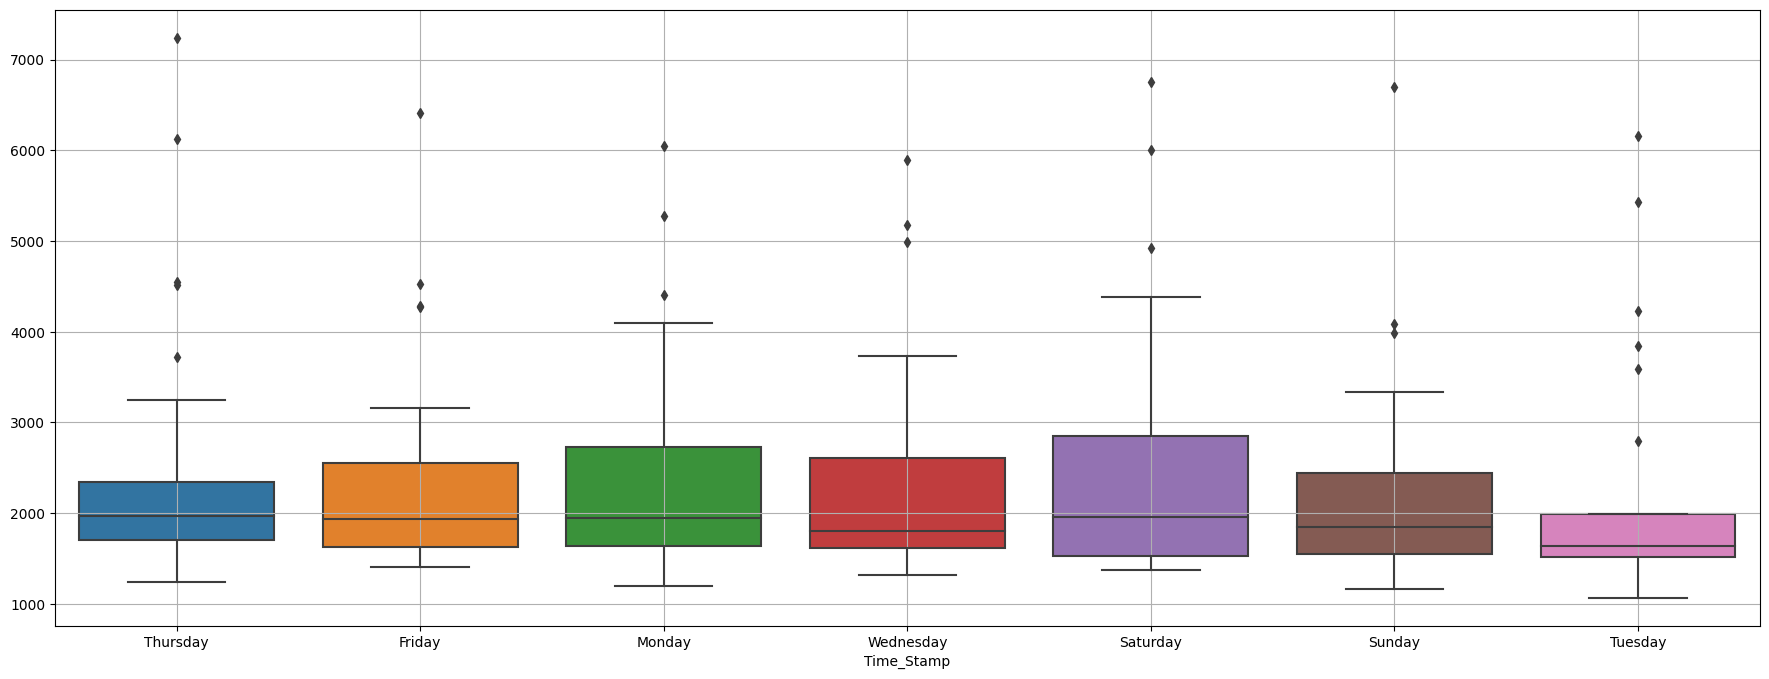

In [30]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.day_name(),y = df.values[:,0],ax=ax)
plt.grid();

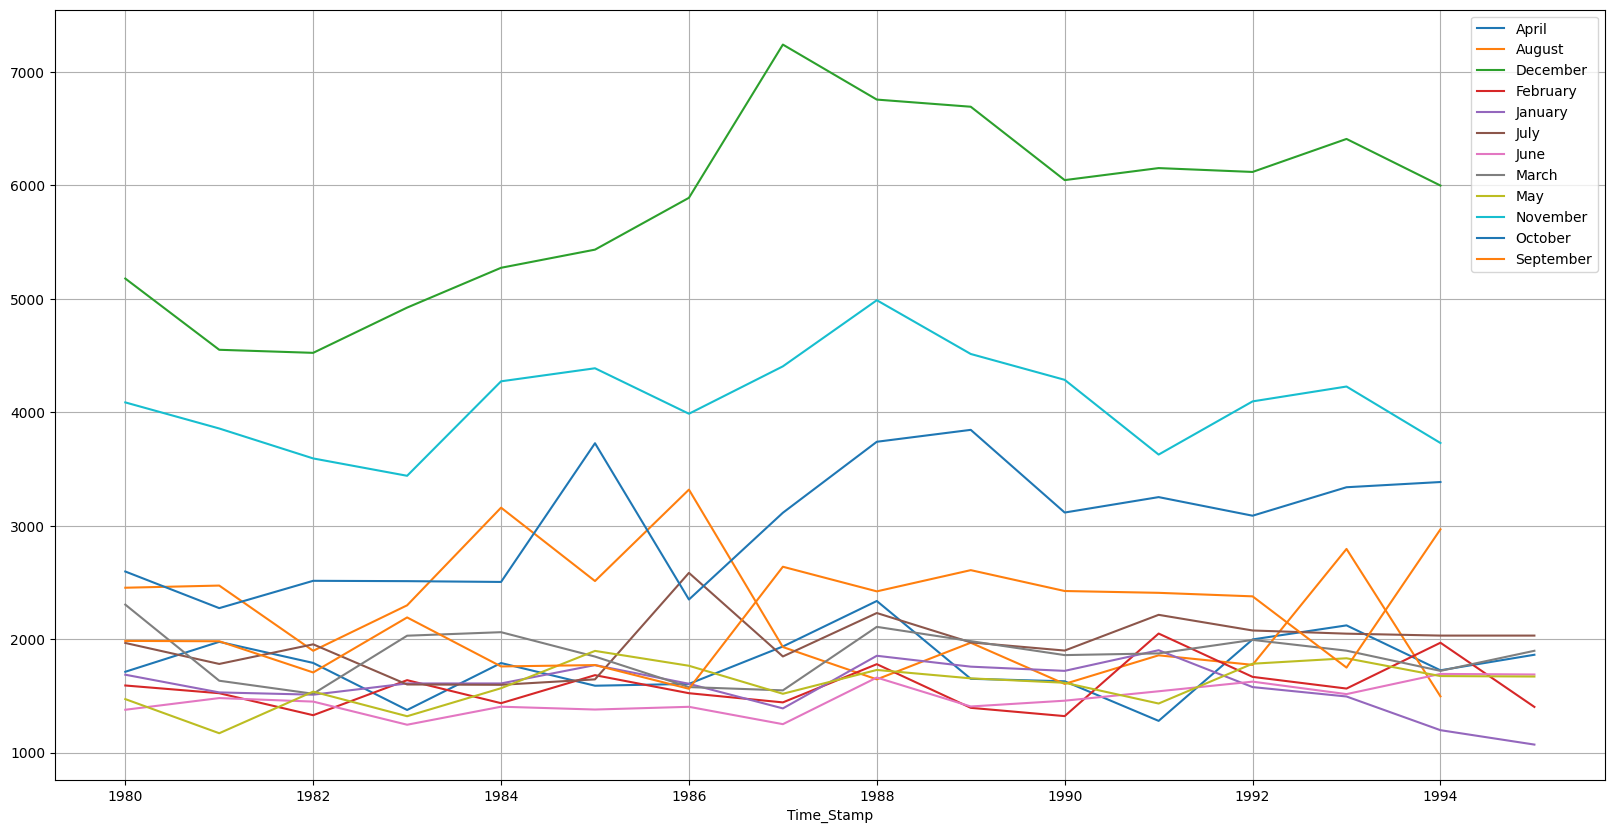

In [31]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

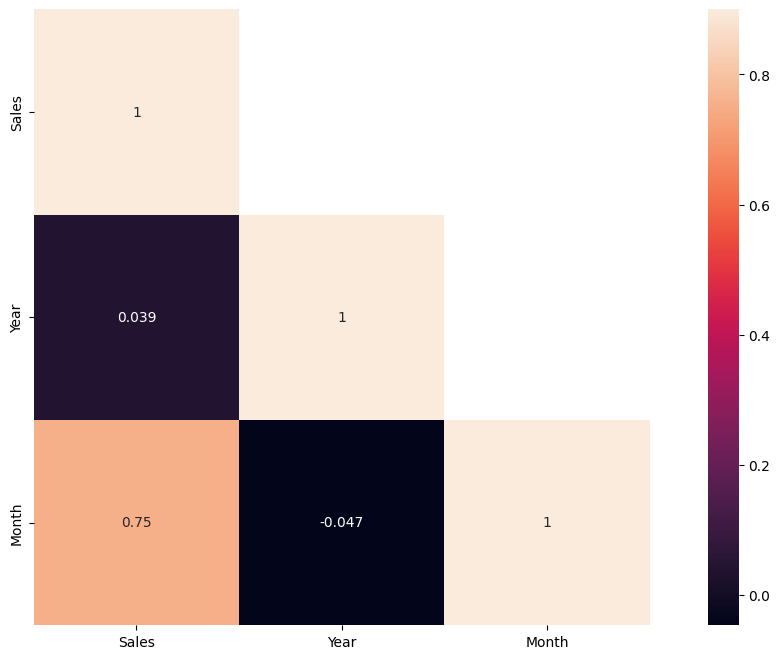

In [32]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

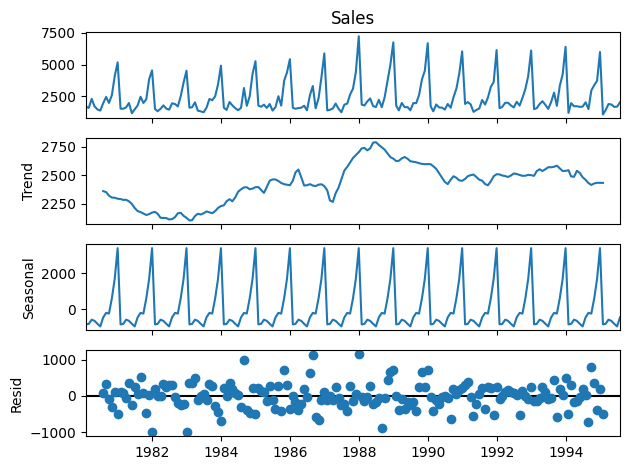

In [33]:
decomposition = seasonal_decompose(df['Sales'],model='additive')
decomposition.plot();

In [34]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

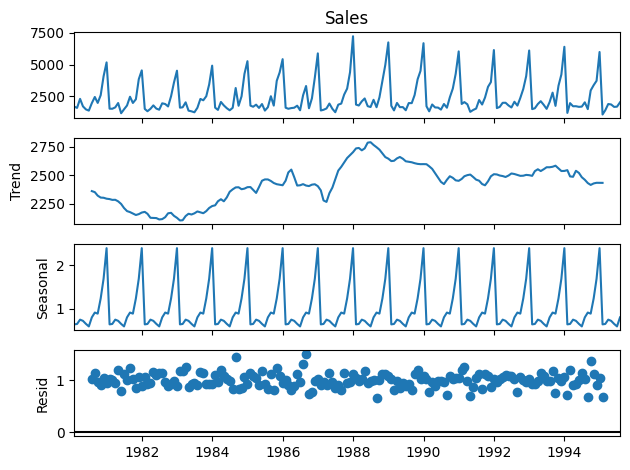

In [35]:
decomposition = seasonal_decompose(df['Sales'],model='multiplicative')
decomposition.plot();

In [36]:

trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

In [37]:
train=df[df.index < '1991-01-01']
test=df[df.index >= '1991-01-01']

In [38]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Sales  Year  Month
Time_Stamp                    
1980-01-31   1686  1980      1
1980-02-29   1591  1980      2
1980-03-31   2304  1980      3
1980-04-30   1712  1980      4
1980-05-31   1471  1980      5 

Last few rows of Training Data 
             Sales  Year  Month
Time_Stamp                    
1990-08-31   1605  1990      8
1990-09-30   2424  1990      9
1990-10-31   3116  1990     10
1990-11-30   4286  1990     11
1990-12-31   6047  1990     12 

First few rows of Test Data 
             Sales  Year  Month
Time_Stamp                    
1991-01-31   1902  1991      1
1991-02-28   2049  1991      2
1991-03-31   1874  1991      3
1991-04-30   1279  1991      4
1991-05-31   1432  1991      5 

Last few rows of Test Data 
             Sales  Year  Month
Time_Stamp                    
1995-03-31   1897  1995      3
1995-04-30   1862  1995      4
1995-0

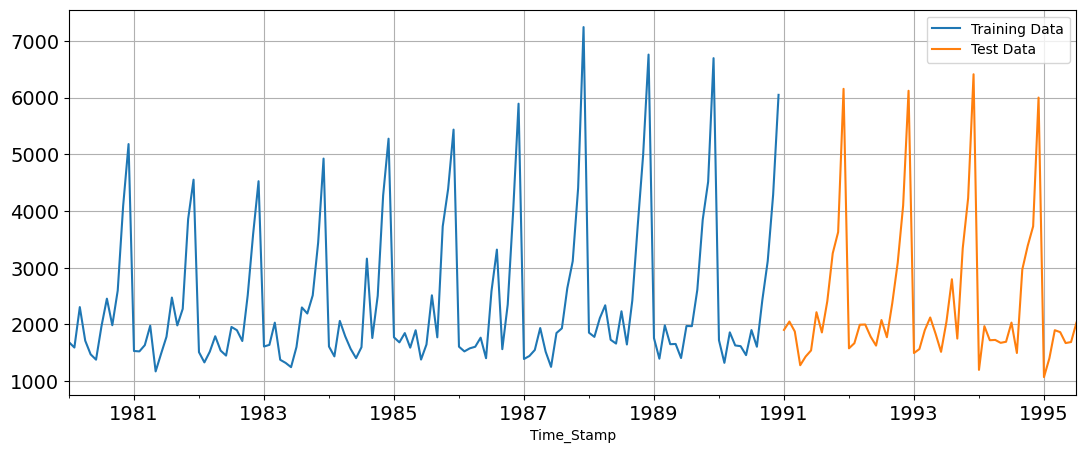

In [39]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [40]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [41]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [42]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

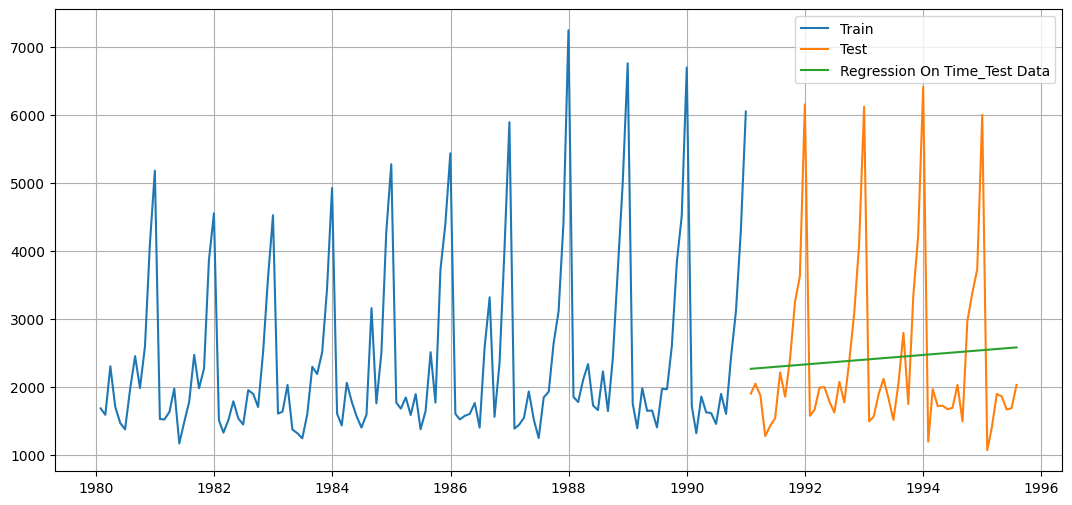

In [43]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [44]:
rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

,Test RMSE
Linear Regression,1275.867052


In [45]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [46]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

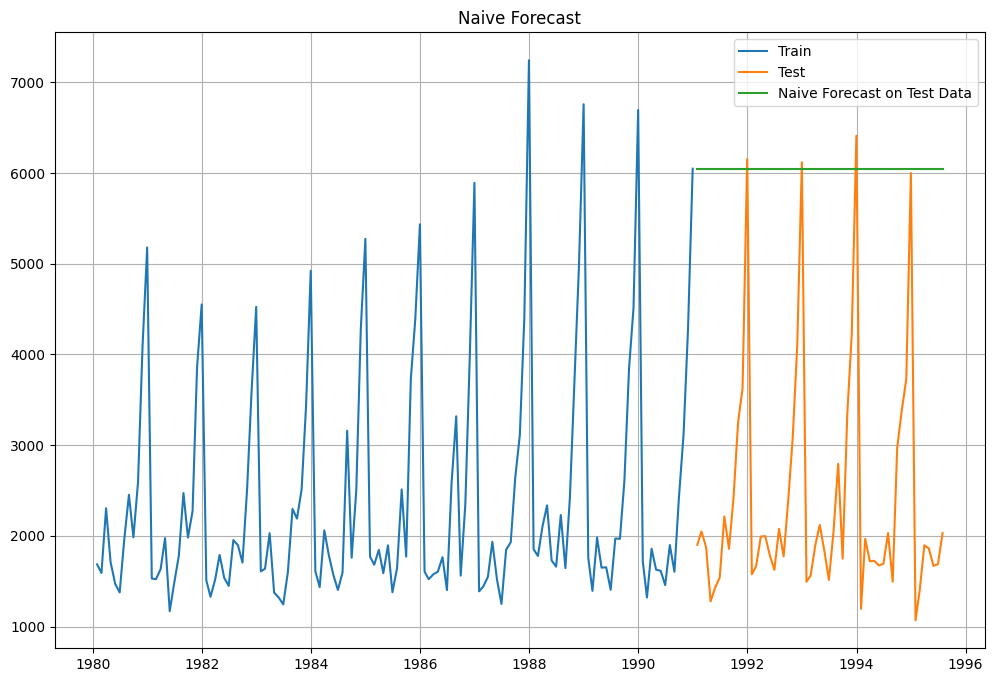

In [47]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [48]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352


In [49]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [50]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Sales,Year,Month,mean_forecast
Time_Stamp,,,,
1991-01-31,1902,1991,1,2403.780303
1991-02-28,2049,1991,2,2403.780303
1991-03-31,1874,1991,3,2403.780303
1991-04-30,1279,1991,4,2403.780303
1991-05-31,1432,1991,5,2403.780303


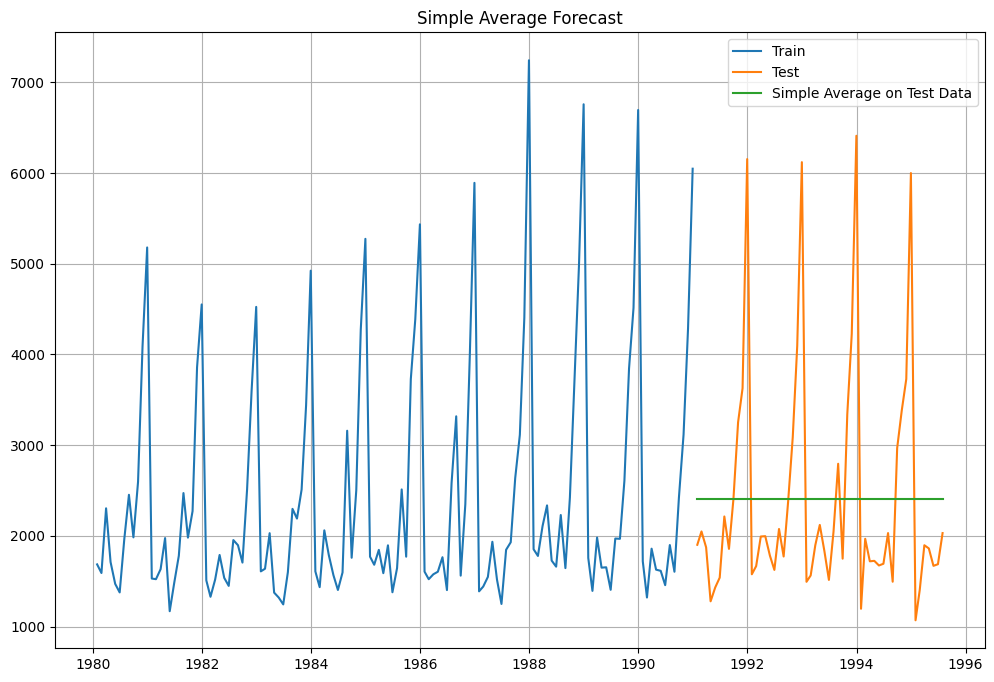

In [51]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [52]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804


In [53]:

MovingAverage = df.copy()
MovingAverage.head()

,Sales,Year,Month
Time_Stamp,,,
1980-01-31,1686,1980,1
1980-02-29,1591,1980,2
1980-03-31,2304,1980,3
1980-04-30,1712,1980,4
1980-05-31,1471,1980,5


In [54]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Sales,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,,,
1980-01-31,1686,1980,1,NaN,NaN,NaN,NaN
1980-02-29,1591,1980,2,1638.5,NaN,NaN,NaN
1980-03-31,2304,1980,3,1947.5,NaN,NaN,NaN
1980-04-30,1712,1980,4,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1980,5,1591.5,1769.50,NaN,NaN


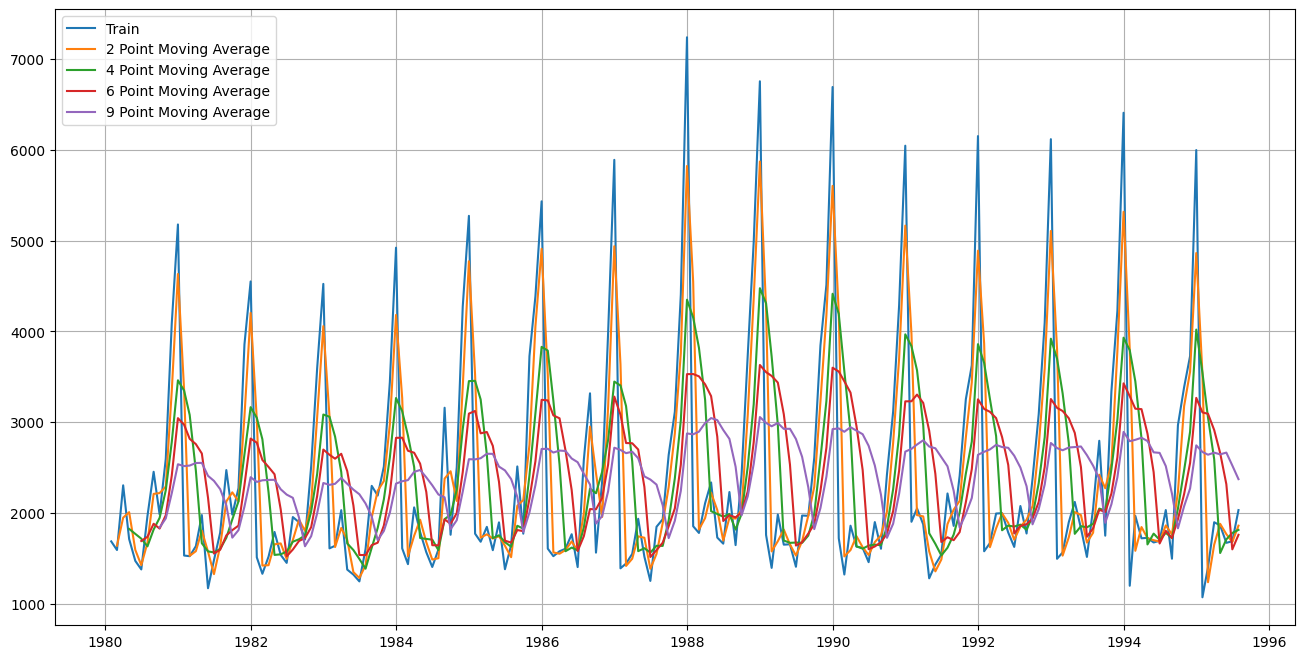

In [55]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [56]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


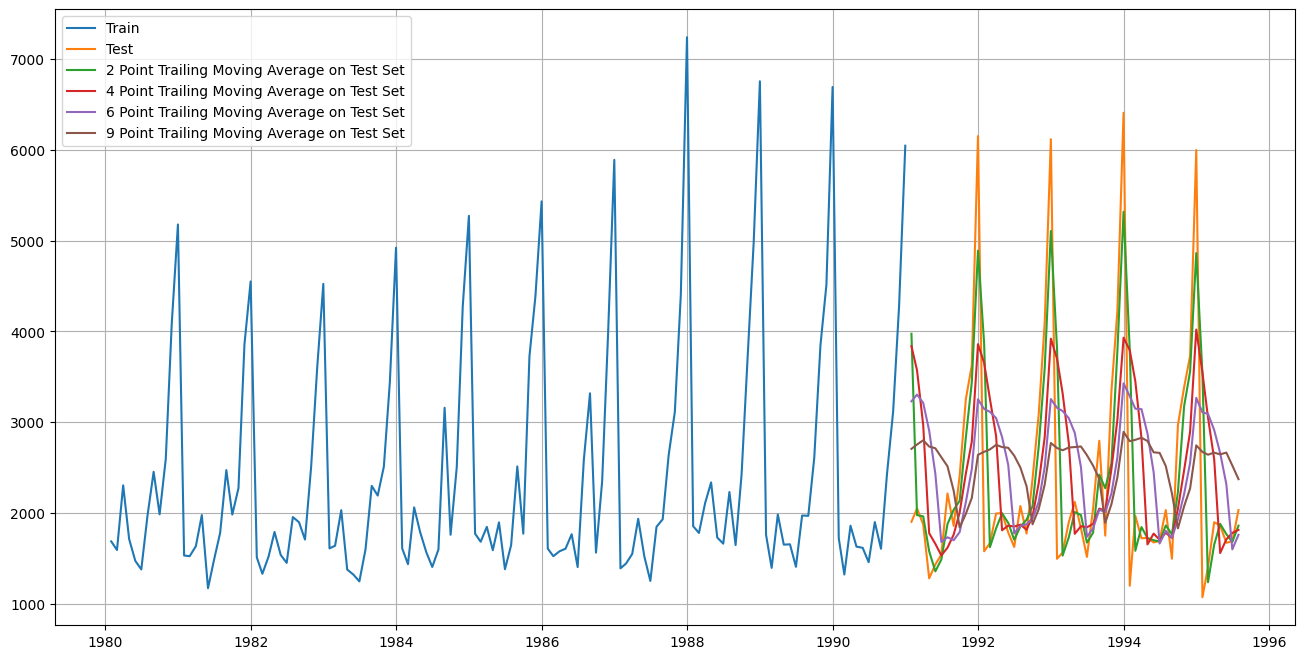

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [58]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [59]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


In [60]:
SES_train = train.copy()
SES_test = test.copy()

In [61]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [62]:
model_SES_autofit = model_SES.fit(optimized=True)

In [63]:
model_SES_autofit.params

{'smoothing_level': 0.03953488372093023,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

,Alpha Values,Train RMSE,Test RMSE


In [65]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sales,Year,Month,predict
Time_Stamp,,,,
1991-01-31,1902,1991,1,2676.676366
1991-02-28,2049,1991,2,2676.676366
1991-03-31,1874,1991,3,2676.676366
1991-04-30,1279,1991,4,2676.676366
1991-05-31,1432,1991,5,2676.676366


In [67]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp.loc[len(resultsDf_temp)]={'Alpha Values': i, 'Train RMSE':rmse_model5_train_i,'Test RMSE':rmse_model5_test_i }

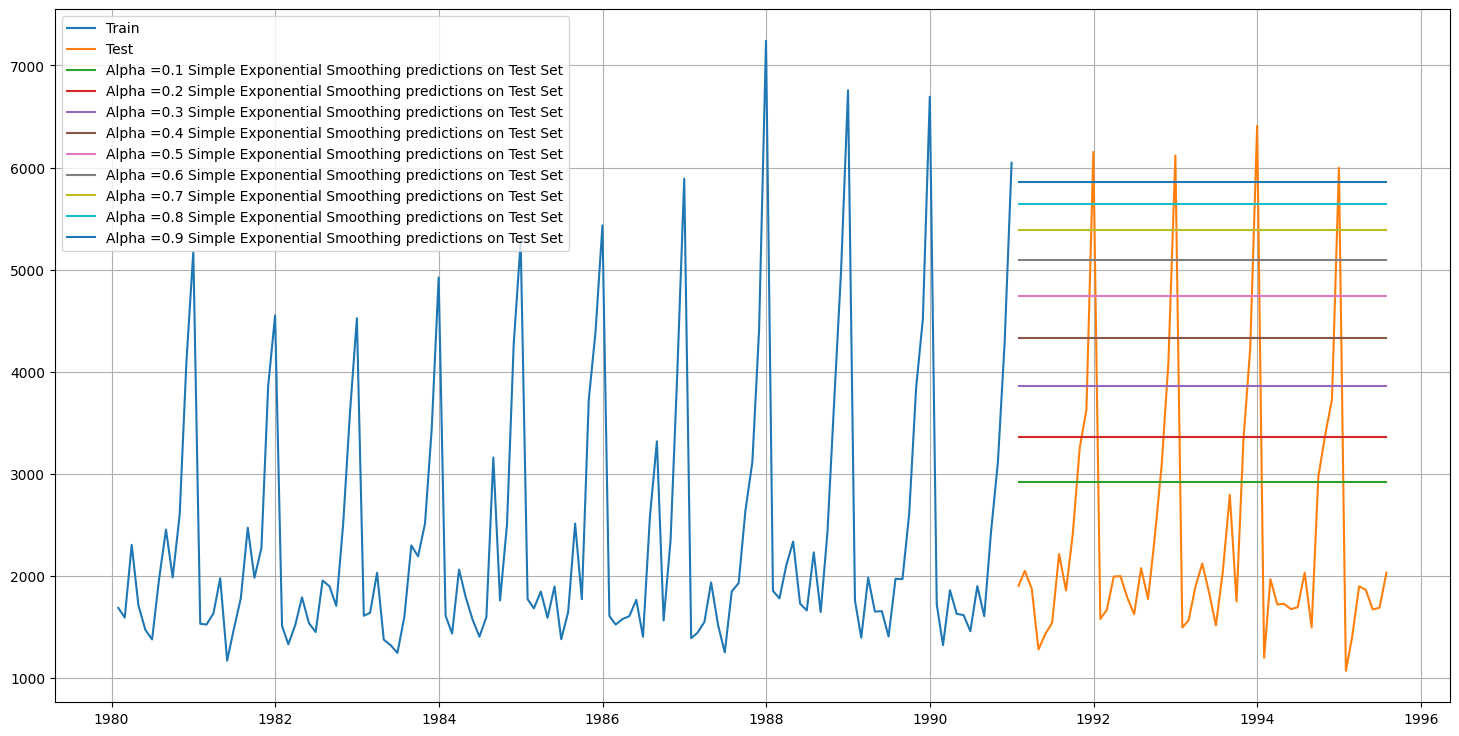

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [69]:

resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,1333.873836,1375.393398
1,0.2,1356.042987,1595.206839
2,0.3,1359.511747,1935.507132
3,0.4,1352.588879,2311.919615
4,0.5,1344.004369,2666.351413
5,0.6,1338.805381,2979.204388
6,0.7,1338.844308,3249.944092
7,0.8,1344.462091,3483.801006
8,0.9,1355.723518,3686.794285


In [70]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398


In [71]:
DES_train = train.copy()
DES_test = test.copy()

In [72]:
model_DES = Holt(DES_train['Sales'])

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [73]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [74]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Sales,Year,Month,predict
Time_Stamp,,,,
1991-01-31,1902,1991,1,5221.278699
1991-02-28,2049,1991,2,5127.886554
1991-03-31,1874,1991,3,5034.494409
1991-04-30,1279,1991,4,4941.102264
1991-05-31,1432,1991,5,4847.710119


In [75]:

del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp


,Alpha Values,Train RMSE,Test RMSE


In [118]:
rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)

print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1304.927


In [119]:
print(rmse_model_temp)

1304.9274045289721


In [77]:

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6.loc[len(resultsDf_6)]={'Alpha Values': i, 'Beta Values':j, 'Train RMSE':rmse_model6_train,'Test RMSE':rmse_model6_test }
resultsDf_6

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
2,0.1,0.3,1445.762015,4293.084674
3,0.1,0.4,1480.897776,6039.537339
4,0.1,0.5,1521.108657,7390.522201
...,...,...,...,...
95,1.0,0.6,1753.402326,49327.087977
96,1.0,0.7,1825.187155,52655.765663
97,1.0,0.8,1902.013709,55442.273880
98,1.0,0.9,1985.368445,57823.177011


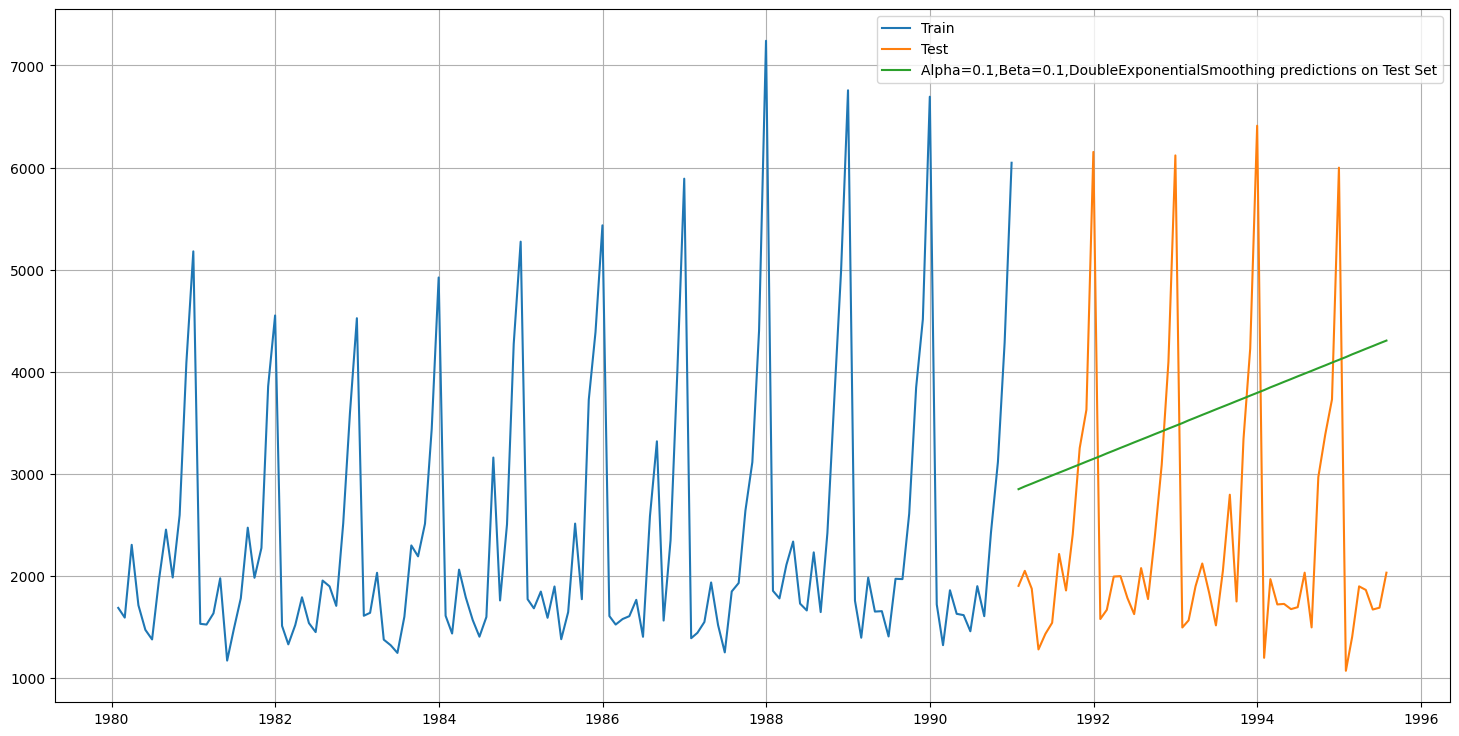

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [79]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.520870,1778.564670
1,0.1,0.2,1413.598835,2599.439986
10,0.2,0.1,1418.041591,3611.763322
2,0.1,0.3,1445.762015,4293.084674
20,0.3,0.1,1431.169601,5908.185554


In [80]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670


In [81]:
TES_train = train.copy()
TES_test = test.copy()

In [82]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [83]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [84]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [85]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [86]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.11127217859992398,
 'smoothing_trend': 0.01236078328796452,
 'smoothing_seasonal': 0.4607177642170641,
 'damping_trend': nan,
 'initial_level': 2356.578308185137,
 'initial_trend': -0.01853556812789492,
 'initial_seasons': array([-636.23360535, -722.98363367, -398.6436108 , -473.43084469,
        -808.42525514, -815.35024951, -384.23066987,   72.99508063,
        -237.44272911,  272.32584554, 1541.3782103 , 2590.0775386 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [87]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.11119949831569428,
 'smoothing_trend': 0.049430920023313805,
 'smoothing_seasonal': 0.3620525701498937,
 'damping_trend': nan,
 'initial_level': 2356.5264391986907,
 'initial_trend': -9.443690175376352,
 'initial_seasons': array([0.71325627, 0.68332509, 0.90537798, 0.80561841, 0.65639659,
        0.65451508, 0.88690241, 1.13423953, 0.91927727, 1.21396745,
        1.86941738, 2.3734461 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.11107188540711412,
 'smoothing_trend': 0.049365309949742364,
 'smoothing_seasonal': 0.3621557605717753,
 'damping_trend': nan,
 'initial_level': 2356.541814724122,
 'initial_trend': 0.9987259871980313,
 'initial_seasons': array([0.73133608, 0.69868555, 0.90031567, 0.81016953, 0.66861198,
        0.66938193, 0.87905698, 1.11657177, 0.91556679, 1.18173667,
        1.84612803, 2.34747359]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [89]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.11525926167295093,
 'smoothing_trend': 0.013289249637018248,
 'smoothing_seasonal': 0.4565935865353621,
 'damping_trend': nan,
 'initial_level': 2357.2388893517714,
 'initial_trend': 0.9994606442736722,
 'initial_seasons': array([-636.77003546, -723.38956008, -397.61934462, -473.71510371,
        -808.95039309, -815.85988383, -384.23255231,   73.66806555,
        -238.14788586,  272.17070913, 1542.70950197, 2591.09596332]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

,Sales,Year,Month,predict_ta_sa
Time_Stamp,,,,
1991-01-31,1902,1991,1,1490.574426
1991-02-28,2049,1991,2,1204.714325
1991-03-31,1874,1991,3,1688.941106
1991-04-30,1279,1991,4,1551.450810
1991-05-31,1432,1991,5,1461.440427


In [91]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

,Sales,Year,Month,predict_ta_sa,predict_ta_sm
Time_Stamp,,,,,
1991-01-31,1902,1991,1,1490.574426,1587.685845
1991-02-28,2049,1991,2,1204.714325,1356.590237
1991-03-31,1874,1991,3,1688.941106,1763.121866
1991-04-30,1279,1991,4,1551.450810,1656.379813
1991-05-31,1432,1991,5,1461.440427,1542.186697


In [92]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

,Sales,Year,Month,predict_ta_sa,predict_ta_sm,predict_tm_sm
Time_Stamp,,,,,,
1991-01-31,1902,1991,1,1490.574426,1587.685845,1591.454098
1991-02-28,2049,1991,2,1204.714325,1356.590237,1360.482080
1991-03-31,1874,1991,3,1688.941106,1763.121866,1767.997947
1991-04-30,1279,1991,4,1551.450810,1656.379813,1661.667528
1991-05-31,1432,1991,5,1461.440427,1542.186697,1547.440667


In [93]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

,Sales,Year,Month,predict_ta_sa,predict_ta_sm,predict_tm_sm,predict_tm_sa
Time_Stamp,,,,,,,
1991-01-31,1902,1991,1,1490.574426,1587.685845,1591.454098,1484.431732
1991-02-28,2049,1991,2,1204.714325,1356.590237,1360.482080,1200.192764
1991-03-31,1874,1991,3,1688.941106,1763.121866,1767.997947,1683.864662
1991-04-30,1279,1991,4,1551.450810,1656.379813,1661.667528,1547.844914
1991-05-31,1432,1991,5,1461.440427,1542.186697,1547.440667,1457.652829


In [94]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 378.626
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 403.706
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 380.393
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 379.646


In [95]:

resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


In [96]:

TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method


In [97]:

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            

            resultsDf_7_2.loc[len(resultsDf_7_2)]={'Alpha Values': i, 'Beta Values':j, 'Gamma Values':k,
                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test,'Method':'ta_sa'  }

In [98]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)    

            resultsDf_7_2.loc[len(resultsDf_7_2)]={'Alpha Values': i, 'Beta Values':j, 'Gamma Values':k,
                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test,'Method':'ta_sm'  }

In [99]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2.loc[len(resultsDf_7_2)]={'Alpha Values': i, 'Beta Values':j, 'Gamma Values':k,
                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test,'Method':'tm_sm'  }

In [100]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2.loc[len(resultsDf_7_2)]={'Alpha Values': i, 'Beta Values':j, 'Gamma Values':k,
                                                   'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test,'Method':'tm_sa'  }

In [101]:
TES_test.head()

,Sales,Year,Month,"(predict_ta_sa, 0.1, 0.1, 0.1)","(predict_ta_sa, 0.1, 0.1, 0.2)","(predict_ta_sa, 0.1, 0.1, 0.30000000000000004)","(predict_ta_sa, 0.1, 0.1, 0.4)","(predict_ta_sa, 0.1, 0.1, 0.5)","(predict_ta_sa, 0.1, 0.1, 0.6)","(predict_ta_sa, 0.1, 0.1, 0.7000000000000001)",...,"(predict_tm_sa, 0.9, 0.8, 0.9)","(predict_tm_sa, 0.9, 0.9, 0.1)","(predict_tm_sa, 0.9, 0.9, 0.2)","(predict_tm_sa, 0.9, 0.9, 0.30000000000000004)","(predict_tm_sa, 0.9, 0.9, 0.4)","(predict_tm_sa, 0.9, 0.9, 0.5)","(predict_tm_sa, 0.9, 0.9, 0.6)","(predict_tm_sa, 0.9, 0.9, 0.7000000000000001)","(predict_tm_sa, 0.9, 0.9, 0.8)","(predict_tm_sa, 0.9, 0.9, 0.9)"
Time_Stamp,,,,,,,,,,,,,,,,,,,,,
1991-01-31,1902,1991,1,1671.894991,1540.529588,1472.827405,1444.947521,1440.100315,1446.456719,1456.102126,...,-5.868610e+20,1681.548575,1003.861817,1011.116778,-268.622873,-1267.416405,140057.792035,2.837339e+09,8.271367e+14,-5.212074e+23
1991-02-28,2049,1991,2,1535.938082,1354.094081,1236.723426,1163.127303,1118.381068,1091.681321,1075.381082,...,-1.101754e+23,2493.688129,1469.309964,1145.238568,-2129.658709,-11966.222163,153448.955624,3.813138e+10,2.759949e+17,-2.662675e+26
1991-03-31,1874,1991,3,1882.992874,1728.658127,1644.294990,1605.772780,1593.658780,1593.602194,1595.700721,...,-4.674701e+24,3209.508652,2499.957287,2962.569457,592.617998,-14594.985341,132162.891870,5.093329e+11,9.097558e+19,-8.209961e+27
1991-04-30,1279,1991,4,1798.243923,1638.281580,1535.922824,1469.062420,1424.230588,1393.229741,1370.975056,...,-5.266723e+25,3046.434803,2171.122226,3050.550334,1923.737151,-785.194212,196998.771995,6.803179e+12,2.998699e+22,1.059273e+31
1991-05-31,1432,1991,5,1576.572747,1470.697707,1394.544409,1347.223962,1324.218679,1318.006765,1319.843928,...,-1.636152e+26,2755.658417,1623.114204,2612.626803,1438.598738,472.443999,236196.434585,9.087032e+13,9.884186e+24,5.889733e+33


In [102]:

resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE,Method
1301,0.4,0.1,0.2,384.467709,317.434302,ta_sm
2245,0.4,0.1,0.3,381.106645,326.579641,tm_sm
1211,0.3,0.2,0.2,388.544148,329.037543,ta_sm
1200,0.3,0.1,0.1,388.220071,337.080969,ta_sm
1110,0.2,0.2,0.1,398.482510,340.186457,ta_sm


In [103]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


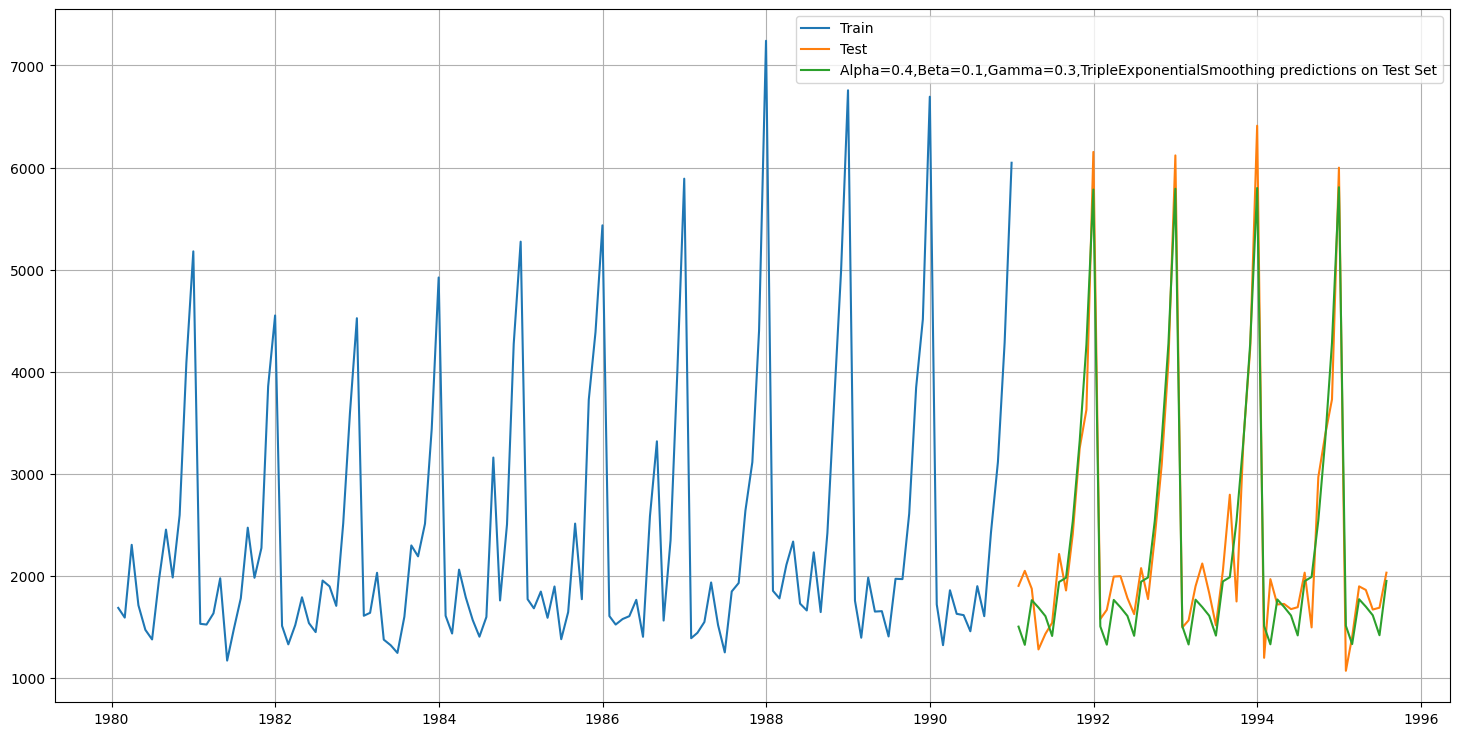

In [104]:
#  Best figures obtained for Trend = Multiplicative and Seasonality = Multiplicative
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.4, 0.1, 0.30000000000000004], 
         label='Alpha=0.4,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [105]:
from statsmodels.tsa.stattools import adfuller

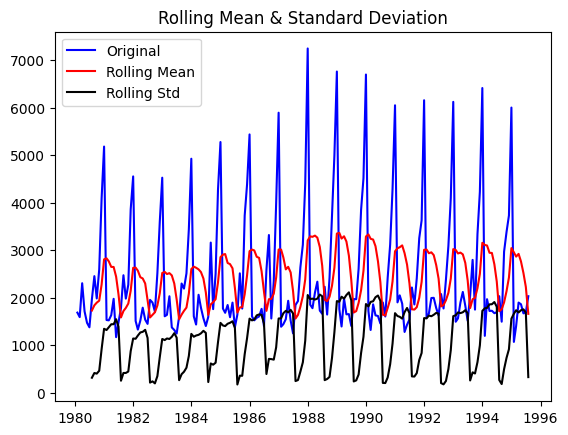

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [106]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(df['Sales'])

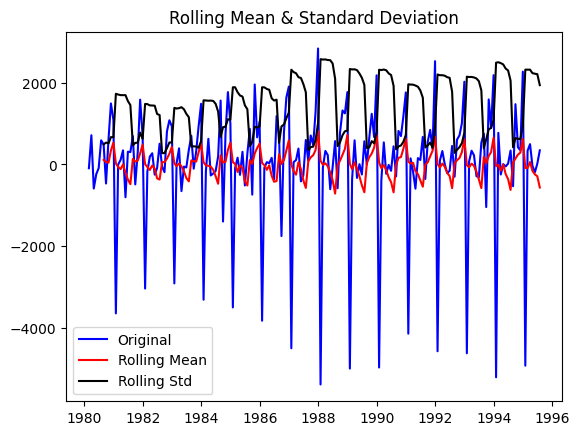

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [107]:
test_stationarity(df['Sales'].diff().dropna())

In [108]:
import itertools
p = q = range(0, 4)
d= range(1,2) #since series is stationary at d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [109]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [110]:

from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC.loc[len(ARIMA_AIC)]={'param': param, 'AIC':ARIMA_model.aic}

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.0600155919765
ARIMA(0, 1, 2) - AIC:2234.4083231363993
ARIMA(0, 1, 3) - AIC:2233.9948577476116
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946605334
ARIMA(1, 1, 2) - AIC:2234.527200451791
ARIMA(1, 1, 3) - AIC:2235.6078087490096
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.7776263565383
ARIMA(2, 1, 2) - AIC:2213.5092127268813


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.8807170301393
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498529474379


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.80367102516
ARIMA(3, 1, 3) - AIC:2221.4602627177997


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [111]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
10,"(2, 1, 2)",2213.509213
15,"(3, 1, 3)",2221.460263
14,"(3, 1, 2)",2230.803671
11,"(2, 1, 3)",2232.880717
9,"(2, 1, 1)",2233.777626
3,"(0, 1, 3)",2233.994858
2,"(0, 1, 2)",2234.408323
6,"(1, 1, 2)",2234.527200
13,"(3, 1, 1)",2235.498529
7,"(1, 1, 3)",2235.607809


In [112]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 27 Aug 2023   AIC                           2213.509
Time:                        09:37:08   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

In [113]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

1299.9786837720856


In [114]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


In [115]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [116]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [117]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC.loc[len(SARIMA_AIC)]={'param': param, 'seasonal':param_seasonal, 'AIC':results_SARIMA.aic}

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616845556
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237635


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3403.6984002705353
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456677
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389058
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791242


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4112.635184549719
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158614114
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.989805392078


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3516.420273392821
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.187105262563
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530065923


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:2897.5437642113443
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956633
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.70895726548


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3647.931409926714
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.179588183827
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193734637
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319653955263


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3972.5977264627663
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175425
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085477014
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.368378636211


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:2938.199407485381
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679617193
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.872799013092
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891873565336


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:2961.887475662225
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687376
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007200607
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890541252


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4260.563961592221
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332265072
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.167507072144
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605068594417


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2980.33619793135
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774529745
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438838744806
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215643066653


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3549.989819951662
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.599341994755
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448370048419
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.688383398882


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3583.477596127917
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408437097
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770698160569
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.2973661022238


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3102.266885458607
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0299988751117
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404077686868
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7418979830143


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:2537.4639609685773
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.571580773388
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0674808897281
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0486202194088


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:2298.7708757486325
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.652944825648
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435177182793
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.041524896835


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:2455.2837897990953
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339904205
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476354865


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3887.705626912334
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330658
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.534359267859
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.489440257533


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3505.305627711807
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080128674
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356132640137
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067514085


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3153.027108758907
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134640390056
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780376798
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660397739912


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3145.4764515811707
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491545654
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.35589741221
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.098135261818


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3760.951965900524
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466615126
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5449250559907
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863571619


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:434.1511299846513
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606816456
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.314223582445
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069967941312


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3012.397646417551
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112073897677
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502479670082
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1417.0148994292297


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3031.9610872194653
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.463345050431
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.770830750458
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421545018


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4511.56036959337
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259800310732
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871792993845
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842468548567
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3082.9900799670872
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.421693218178
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5250822385185
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.9345683952001


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3802.3022141710308
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8102407378021
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.9146986107548
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.96903286134


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3827.0055393990065
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.02640397802
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.9381449632474
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1646.5176702306867


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3539.9326507150295
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596390512
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554891707553
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5744598565204


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3029.175685464432
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.415406429198
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3669017294899
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1293039535692


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2893.9045315982894
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723331389743
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.750968947707
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.764929153293


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2831.896782498171
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435409325
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039844571


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4626.699387393255
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066055527
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.935734923392
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204068258


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3311.712106599385
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464878537
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344987368411
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191732178758


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:1978.4241387966345
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728031473
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017619709396
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1975645301964


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3158.912979600979
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145602
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495949891
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.4234080336503


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3116.6353195250776
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234290341081
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911246979726
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.988830741806


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3995.2386304795486
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896697
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595849452108
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428711263643


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3307.7186159282373
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.467333360484
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1221280990683
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.82413936644
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3333.3037736473625
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681149186013
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372638364088
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.552343351338


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3838.417001666177
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931849879
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6086050609902
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404017478606
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3446.5366635288196
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1599.5275159051232
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476112822964
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.6893417232511


C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


KeyboardInterrupt: 

In [120]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
87,"(1, 1, 1)","(1, 0, 3, 12)",434.151130
156,"(2, 1, 1)","(3, 0, 0, 12)",1402.467333
157,"(2, 1, 1)","(3, 0, 1, 12)",1403.122128
158,"(2, 1, 1)","(3, 0, 2, 12)",1403.824139
140,"(2, 1, 0)","(3, 0, 0, 12)",1411.944973


In [121]:
auto_SARIMA_6_1 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6_1 = auto_SARIMA_6_1.fit(maxiter=1000)
print(results_auto_SARIMA_6_1.summary())

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -210.076
Date:                                    Sun, 27 Aug 2023   AIC                            434.151
Time:                                            09:50:21   BIC                            451.879
Sample:                                                 0   HQIC                           441.309
                                                    - 132                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9211      0.018     50.776      0

In [122]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 27 Aug 2023   AIC                           1555.584
Time:                                    09:50:30   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

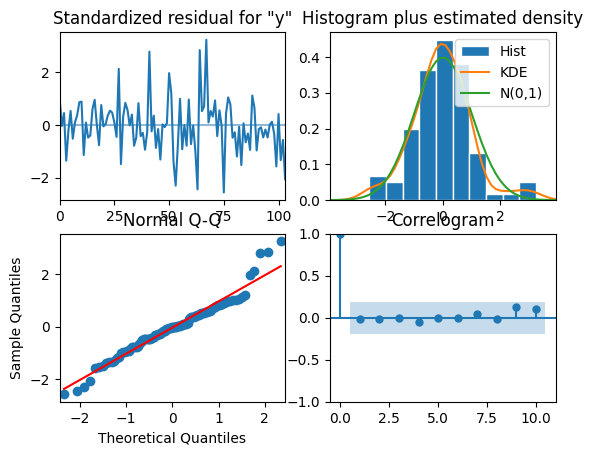

In [123]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

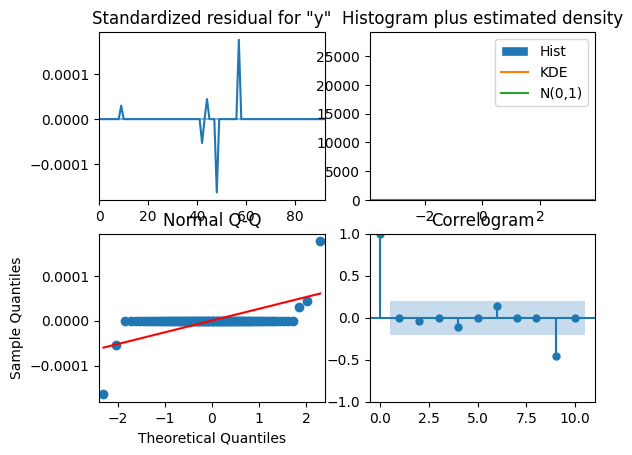

In [125]:
results_auto_SARIMA_6_1.plot_diagnostics()
plt.show()

In [126]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.400186,388.343516,566.260880,2088.539492
1,1315.130458,402.006044,527.213090,2103.047827
2,1621.602722,401.999650,833.697886,2409.507557
3,1598.885157,407.237112,800.715085,2397.055229
4,1392.703468,407.967025,593.102793,2192.304143


In [127]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

528.6023754080326


In [128]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(1,1,1),(1,0,3,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


In [129]:
manual_ARIMA = ARIMA(train['Sales'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 27 Aug 2023   AIC                           2235.755
Time:                        10:02:43   BIC                           2244.381
Sample:                    01-31-1980   HQIC                          2239.260
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\harin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


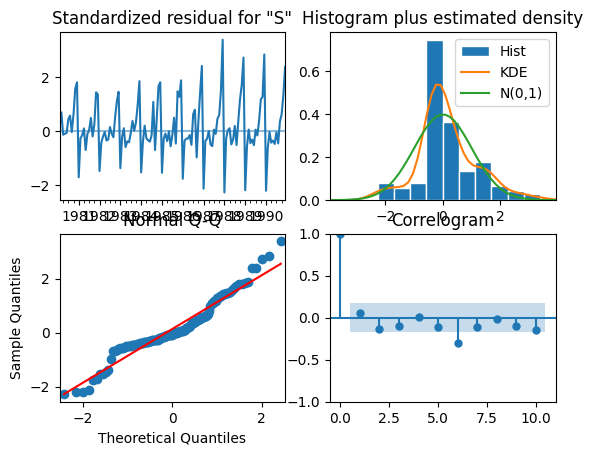

In [130]:
results_manual_ARIMA.plot_diagnostics();

In [131]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 1319.9367341217417


In [132]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


In [133]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [135]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -882.088
Date:                            Sun, 27 Aug 2023   AIC                           1774.175
Time:                                    10:03:00   BIC                           1788.071
Sample:                                         0   HQIC                          1779.818
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1957      0.104      1.878      0.060      -0.009       0.400
ma.L1         -0.9404      0.053   

In [136]:
# SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
#                                ignore_index=True)
SARIMA_AIC.loc[len(SARIMA_AIC)]={'param': param, 'seasonal':param_seasonal ,'AIC':results_manual_SARIMA.aic}
SARIMA_AIC

,param,seasonal,AIC
0,"(2, 1, 2)","(2, 0, 3, 12)",1774.175347


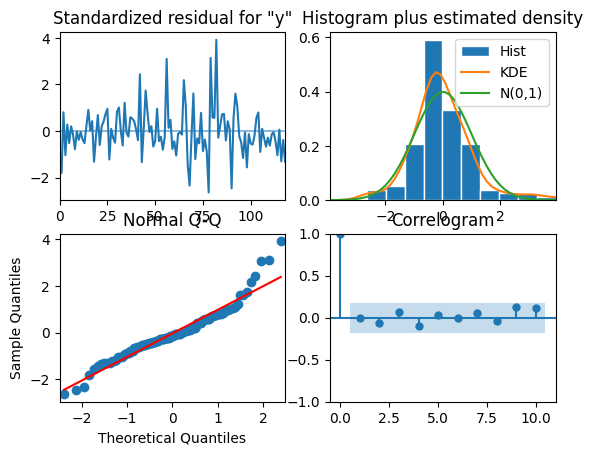

In [137]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [138]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1543.900070,388.532056,782.391234,2305.408906
1,1311.208249,400.994067,525.274320,2097.142178
2,1810.538054,403.246198,1020.190029,2600.886080
3,1650.451755,404.472603,857.700020,2443.203490
4,1561.609704,405.532743,766.780134,2356.439274


In [139]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

359.61244874115783


In [140]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(1,1,1)(1,1,1,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

,Test RMSE
Linear Regression,1275.867052
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.1,SimpleExponentialSmoothing",1375.393398
"Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing",1778.564670
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


In [141]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing",317.434302
"(1,1,1)(1,1,1,12),Manual_SARIMA",359.612449
"(1,1,1),(1,0,3,12),Auto_SARIMA",528.602375
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
Simple Average Model,1275.081804
Linear Regression,1275.867052
6pointTrailingMovingAverage,1283.927428
Auto_ARIMA,1299.978684
"Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit",1304.927405


In [ ]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

In [ ]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

In [ ]:
future_predictions

In [ ]:
df.head()

In [ ]:
TES_train.head()

In [ ]:

TES_train = data.copy()

In [ ]:
TES_train.info()

In [ ]:
#TES_train['Time_Stamp'] = pd.to_datetime(TES_train['Time_Stamp']) - MonthBegin(1)
TES_train.Time_Stamp = pd.to_datetime(TES_train.Time_Stamp.values.astype('datetime64[M]'))

In [ ]:
TES_train.head()

In [ ]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sparkling'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [ ]:
prediction.head()

In [ ]:
prediction.dtype

In [ ]:
pd.to_datetime(df.date).dt.to_period('M').dt.to_timestamp()

In [ ]:
future_predictions['Sales_Predictions']=prediction
future_predictions

In [ ]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

In [ ]:
# plot the forecast along with the confidence band

axis = data['Sparkling'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()